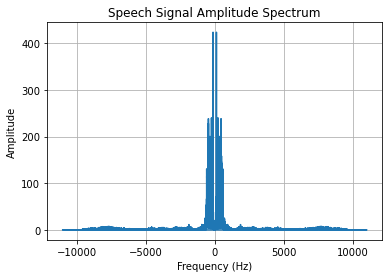

In [6]:
#1 
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display
y, sr = librosa.load("C:/Users/KAILASH/Downloads/pranave_speech.wav")
ffts = np.fft.fft(y)
amplitudes = np.abs(ffts)
frequencies = np.fft.fftfreq(len(y), d=1.0 / sr)
plt.plot(frequencies, amplitudes)  
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Speech Signal Amplitude Spectrum")
plt.grid(True)
plt.show()

In [2]:
pip install --upgrade pip

  Attempting uninstall: pip
Note: you may need to restart the kernel to use updated packages.
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


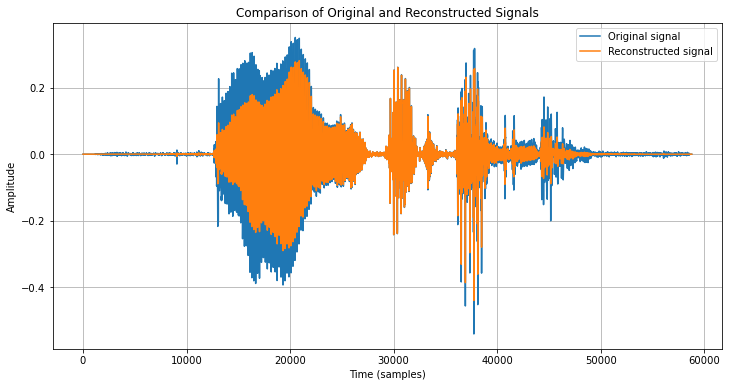

Mean squared error: 0.0004717093100915365
Peak error: 0.15412087581395204


In [4]:
#2
import numpy as np
import matplotlib.pyplot as plt
import librosa
speech_signal, sample_rate = librosa.load("C:/Users/KAILASH/Downloads/pranave_speech.wav")
window = np.hanning(len(speech_signal))
speech_signal_windowed = speech_signal * window
fft_result = np.fft.fft(speech_signal_windowed)
inversed_signal = np.fft.ifft(fft_result)
plt.figure(figsize=(12, 6))
plt.plot(speech_signal[:len(inversed_signal)], label='Original signal')
plt.plot(np.real(inversed_signal), label='Reconstructed signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Comparison of Original and Reconstructed Signals')
plt.legend()
plt.grid(True)
plt.show()
error = np.abs(speech_signal[:len(inversed_signal)] - np.real(inversed_signal))
print(f"Mean squared error: {np.mean(error**2)}")
print(f"Peak error: {np.max(error)}")


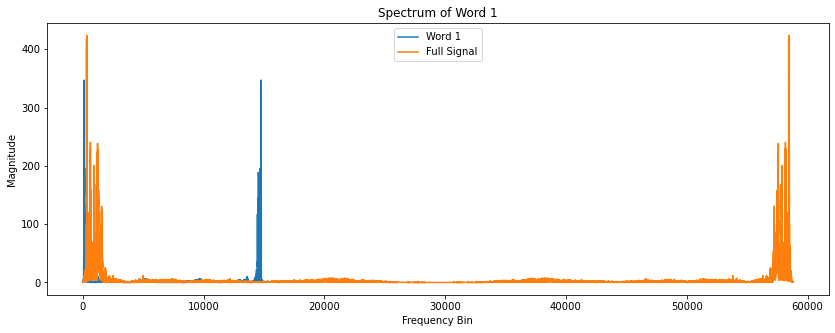

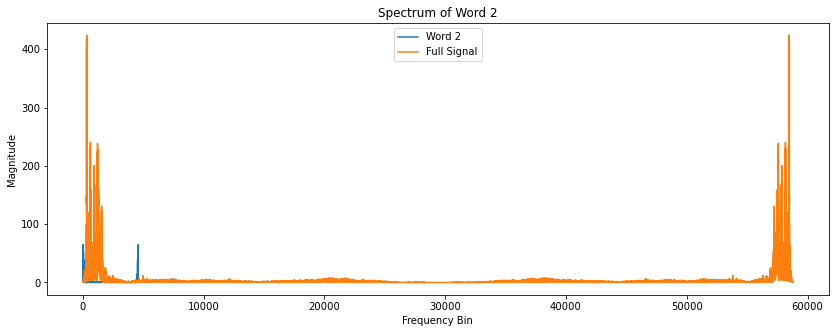

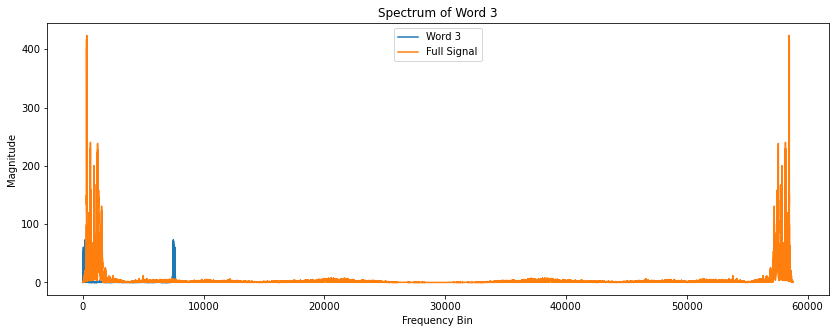

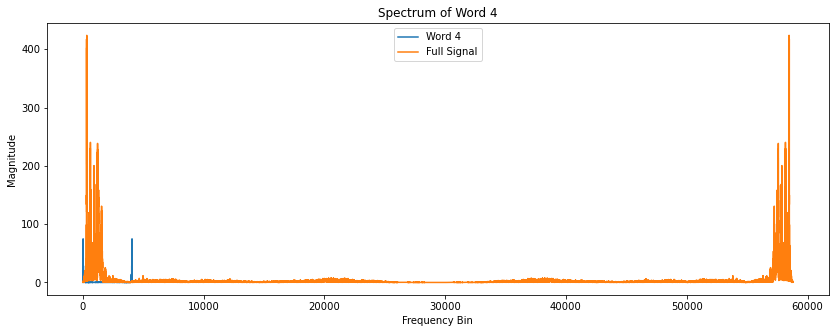

In [27]:
#3
import numpy as np
import matplotlib.pyplot as plt
import librosa

audio_file_path = "C:/Users/KAILASH/Downloads/pranave_speech.wav"
speech_signal, sample_rate = librosa.load(audio_file_path)

threshold = np.percentile(np.abs(speech_signal), 92)
segments = librosa.effects.split(speech_signal, top_db=-20 * np.log10(threshold))
for i, (start, end) in enumerate(segments):
    word = speech_signal[start:end]  
    D_full = np.fft.fft(speech_signal)
    D_word = np.fft.fft(word)
    plt.figure(figsize=(14, 5))
    plt.plot(np.abs(D_word), label=f'Word {i+1}') 
    plt.plot(np.abs(D_full), label='Full Signal') 

    plt.title(f'Spectrum of Word {i+1}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    plt.legend() 
    plt.show()


 Audio file sample rate is 22050


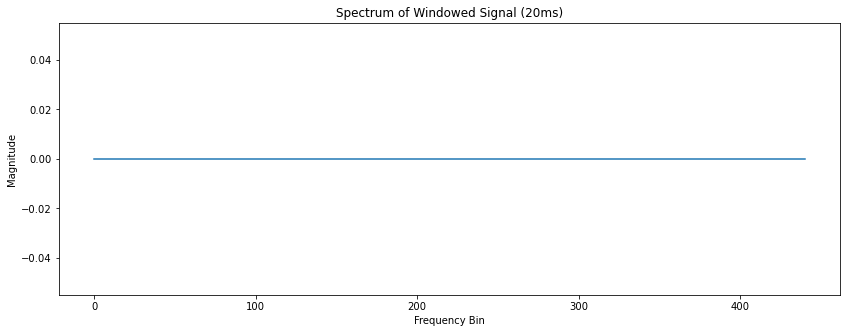

In [31]:
#4
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
audio_file_path = "C:/Users/KAILASH/Downloads/pranave_speech.wav"
speech_signal, sample_rate = librosa.load(audio_file_path)
if sample_rate != 22500:
    print(" Audio file sample rate is", sample_rate)
window_duration_ms = 20
window_length = int(window_duration_ms * sample_rate / 1000)
window = signal.windows.boxcar(window_length)
windowed_signal = speech_signal[:window_length] * window
fft_windowed = np.fft.fft(windowed_signal)
plt.figure(figsize=(14, 5))
plt.plot(np.abs(fft_windowed))
plt.title('Spectrum of Windowed Signal (20ms)')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.show()


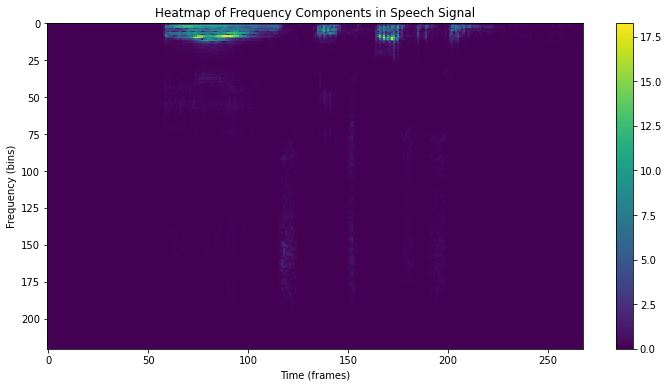

In [19]:
#5
import numpy as np
import matplotlib.pyplot as plt
import librosa
speech_signal, sample_rate = librosa.load("C:/Users/KAILASH/Downloads/pranave_speech.wav")
window_size = 0.02
window_length = int(window_size * sample_rate)
hop_size = window_length // 2
stft_matrix = librosa.stft(speech_signal, n_fft=window_length, hop_length=hop_size)
stft_mag = np.abs(stft_matrix)
plt.figure(figsize=(12, 6))
plt.imshow(stft_mag, aspect='auto', interpolation='nearest')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency (bins)')
plt.title('Heatmap of Frequency Components in Speech Signal')
plt.colorbar()
plt.show()


C:\Users\KAILASH\AppData\Local\Temp\ipykernel_9556\3565380576.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))


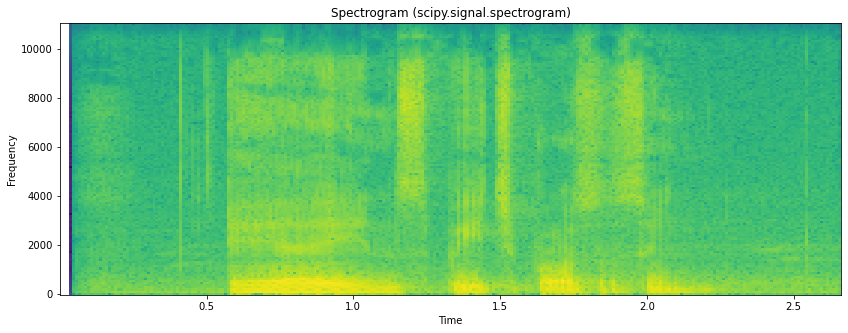

In [22]:
# Question 6
## Use scipy's signal.spectrogram function to plot the spectrogram of the speech signal
frequencies, times, Sxx = signal.spectrogram(y, sr)
plt.figure(figsize=(14, 5))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.title('Spectrogram (scipy.signal.spectrogram)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()